In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
import scipy as scipy

In [3]:
import scipy.stats as stats

In [4]:
from scipy.stats import chi2

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# BUSINESS PROBLEM-1

## BUSINESS PROBLEM:

**Using lending club loans data, the team would like to test below hypothesis on how different
factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)**

### Importing data

In [6]:
loan_data = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/4. Basic Statistics - Hypothesis Testing/LoansData.csv')

In [7]:
loan_data.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


##### Making the column names proper

In [8]:
loan_data.columns = loan_data.columns.str.replace('.','_')

In [9]:
loan_data.columns = loan_data.columns.str.replace(' ','')

##### Type Casting

In [10]:
loan_data.Interest_Rate = loan_data.Interest_Rate.str.replace("%","").astype("float64")

In [11]:
loan_data.Debt_To_Income_Ratio = loan_data.Debt_To_Income_Ratio.str.replace("%","").astype("float64")

### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [12]:
loan_data.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years


In [13]:
loan_data = loan_data.dropna(axis = 0, subset = ['Amount_Funded_By_Investors'])

In [14]:
loan_data = loan_data.dropna(axis = 0, subset = ['Interest_Rate'])

In [15]:
intrest_amount = loan_data.Interest_Rate.corr(loan_data.Amount_Funded_By_Investors)

In [16]:
intrest_amount

0.33745400436759676

In [17]:
np.corrcoef(loan_data.Interest_Rate,loan_data.Amount_Funded_By_Investors)[0][1]

0.33745400436759676

In [18]:
if round(intrest_amount) ==0:
    print('No,relationship or absolutely independent variable')
elif round(intrest_amount) ==1:
    print('Perfect positive corelation')
elif round(intrest_amount) ==-1:
    print('Negative corelation')

No,relationship or absolutely independent variable


- **Analysis :** There is no any relation between Intrest rate and Amount funded

### b. Loan length is directly effecting intrest rate.

In [19]:
loan_d1 = loan_data.loc[:,['Loan_Length','Interest_Rate']]

In [20]:
loan_d1.isna().sum()

Loan_Length      0
Interest_Rate    0
dtype: int64

In [21]:
loan_d1.dropna(axis=0,inplace=True)

In [22]:
loan_d1.Loan_Length.value_counts()

36 months    1949
60 months     548
Name: Loan_Length, dtype: int64

In [23]:
lenth_36 = loan_d1.loc[loan_d1.Loan_Length == '36 months',['Interest_Rate']]

In [24]:
lenth_60 = loan_d1.loc[loan_d1.Loan_Length == '60 months',['Interest_Rate']]

In [25]:
print('36 Months mean :',lenth_36.mean()[0])
print('60 Months mean :',lenth_60.mean()[0])

36 Months mean : 12.126393022062706
60 Months mean : 16.40746350364961


In [26]:
F_stats,P_value = stats.f_oneway(lenth_36,lenth_60)

In [27]:
print('F stats :',F_stats)
print('P Value :',P_value)

F stats : [547.42935819]
P Value : [1.26751093e-109]


In [28]:
if P_value < 0.05:
    print('Null Hypothesis Reject')
else:
    print('Null Hypothesis Accept')

Null Hypothesis Reject


- f val: 547.76

- Significance Level: 0.05 (5%)
- P value: 1.09526645e-109 (LOW)
- p val < signi value
- Accepting the Ha
- Ha: 12.126 != 16.407
<br>

- **Analysis** : Loan length is directly effecting intrest rate.

### c. Inrest rate varies for different purpose of loans

In [29]:
loan_data.Interest_Rate.isna().sum()

0

In [30]:
mod1 = ols('Interest_Rate~Loan_Purpose',data=loan_data).fit()

In [31]:
aov1 = sm.stats.anova_lm(mod1,type=2)

In [32]:
print(aov1)

                  df        sum_sq     mean_sq        F        PR(>F)
Loan_Purpose    13.0   1643.352064  126.411697  7.48671  1.134960e-14
Residual      2483.0  41924.989596   16.884813      NaN           NaN


In [33]:
f_value = aov1.iloc[0,3]
p_value = aov1.iloc[0,4]

print('f_value :',f_value)
print('p_value :',p_value)

f_value : 7.486710128328661
p_value : 1.1349601779818787e-14


In [34]:
if p_value < 0.05:
    print('Null Hypothesis Reject')
else:
    print('Null Hypothesis Accept')

Null Hypothesis Reject


- f val: 7.481404351302268

- Significance Level: 0.05 (5%)
- P value: 1.1686298123677374e-14 (LOW)
- p val < signi value
- Accepting the Ha
<br>

- **Analysis** : The Inrest rate varies for different purpose of loans as the mean for each purpose is different.

### d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

In [35]:
loan_data.head(2)

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years


In [36]:
loan_data[['Fico_Low', 'Fico_High']] = loan_data.FICO_Range.str.split('-',expand=True)

In [37]:
loan_data.Fico_Low = loan_data.Fico_Low.astype('float64')
loan_data.Fico_High = loan_data.Fico_High.astype('float64')

In [38]:
loan_data['Fico_Avg'] = (loan_data.Fico_Low+loan_data.Fico_High)/2

In [39]:
loan_data = loan_data.dropna(axis = 0, subset = ['Home_Ownership','Fico_Avg'])

In [40]:
loan_data.Home_Ownership.value_counts()

MORTGAGE    1145
RENT        1143
OWN          200
OTHER          5
NONE           1
Name: Home_Ownership, dtype: int64

In [41]:
MORTGAGE = loan_data.loc[loan_data.Home_Ownership=='MORTGAGE',['Fico_Avg']]
RENT = loan_data.loc[loan_data.Home_Ownership=='RENT',['Fico_Avg']]
OWN = loan_data.loc[loan_data.Home_Ownership=='OWN',['Fico_Avg']]
OTHER = loan_data.loc[loan_data.Home_Ownership=='OTHER',['Fico_Avg']]
NONE = loan_data.loc[loan_data.Home_Ownership=='NONE',['Fico_Avg']]

In [42]:
print('MORTGAGE Mean :',MORTGAGE.mean()[0])
print('RENT Mean :',RENT.mean()[0])
print('OWN Mean :',OWN.mean()[0])
print('OTHER Mean :',OTHER.mean()[0])
print('NONE Mean :',NONE.mean()[0])

MORTGAGE Mean : 713.7161572052402
RENT Mean : 702.0831146106736
OWN Mean : 708.55
OTHER Mean : 674.0
NONE Mean : 802.0


In [43]:
F_stats,P_value = stats.f_oneway(MORTGAGE,RENT,OWN,OTHER,NONE)

In [44]:
print('F stats :',F_stats)
print('P Value :',P_value)

F stats : [19.2830013]
P Value : [1.22937612e-15]


In [45]:
if P_value < 0.05:
    print('Null Hypothesis Reject')
else:
    print('Null Hypothesis Accept')

Null Hypothesis Reject


- f val: 19.27300361

- Significance Level: 0.05 (5%)
- P value: 1.25256443e-15 (LOW)
- p val < signi value
- Accepting the Ha
- H0: 713 != 702 != 708 != 674 != 802
<br>

- **Analysis** : There is a relationship between FICO scores and Home Ownership i.e, people with owning home will have high FICO scores.

# BUSINESS PROBLEM - 2

## BUSINESS PROBLEM: 

**We would like to assess if there is any difference in the average
price quotes provided by Mary and Barry.**


In [46]:
price_quotes = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/4. Basic Statistics - Hypothesis Testing/Price_Quotes.csv')

In [47]:
price_quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [48]:
print('Barry Price Mean :',round(price_quotes.Barry_Price.mean(),2))
print('Mary Price Mean :',price_quotes.Mary_Price.mean())

Barry Price Mean : 124.33
Mary Price Mean : 114.75


In [49]:
Stats,p_value = stats.ttest_ind(price_quotes['Barry_Price'],price_quotes['Mary_Price'])

In [50]:
print('p_value :',p_value)
print('t_stats :',Stats)

p_value : 0.17114226132118285
t_stats : 1.4147436739281787


In [51]:
# alpha value is 0.05 or 5%

if p_value < 0.05:
    print('Null Hypothesis Reject')
else:
    print('Null Hypothesis Accept')

Null Hypothesis Accept


- t val: 1.4147436739281787

- Significance Level: 0.05 (5%)
- P value: 0.17114226132118285
- p val > signi value
- Accepting the H0
- Ha: 124.33 != 114.75
<br>

- **Analysis** :  There is a difference in the average price quotes provided by Mary and Barry i.e, 114.75 and 124.33 respectively.

# BUSINESS PROBLEM - 3

## BUSINESS PROBLEM:

**Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff turnover. i.e To  determine if the reengineering effort changed the critical incidence rate. Isthere evidence that the critical incidence rate improved?**

In [52]:
treatment_facility = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/4. Basic Statistics - Hypothesis Testing/Treatment_Facility.csv')

In [53]:
treatment_facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [54]:
Prior_data = treatment_facility.loc[treatment_facility.Reengineer == 'Prior',['Employee_Turnover']]

In [55]:
Post_data = treatment_facility.loc[treatment_facility.Reengineer == 'Post',['Employee_Turnover']]

In [56]:
print('Prior_data Mean :',round(Prior_data.mean()[0],2))
print('Post_data Mean :',round(Post_data.mean()[0],2))

Prior_data Mean : 11.74
Post_data Mean : 18.69


In [57]:
Stats,p_value = stats.ttest_ind(Prior_data,Post_data)

In [58]:
print('t_stats :',Stats)
print('p_value :',p_value)

t_stats : [-1.7703067]
p_value : [0.09361109]


In [59]:
# alpha value is 0.05 or 5%

if p_value < 0.05:
    print('Null Hypothesis Reject')
else:
    print('Null Hypothesis Accept')

Null Hypothesis Accept


- t val: -1.7703067

- Significance Level: 0.05 (5%)
- P value: 0.09361109 (HIGH)
- p val > signi value
- Accepting the H0
- Ha: 11.74 != 18.69
<br>

- **Analysis** : There is no statistically significant difference that the reengineering effort changed the critical incidence rate

# BUSINESS PROBLEM-4

# BUSINESS PROBLEM:

**We will focus on the prioritization system. If the system is working, then
high priority jobs, on average, should be completed more quickly than medium priority jobs,
and medium priority jobs should be completed more quickly than low priority jobs. Use the
data provided to determine whether thisis, in fact, occurring.**

In [60]:
priority_assessment = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/4. Basic Statistics - Hypothesis Testing/Priority_Assessment.csv')

In [61]:
priority_assessment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [62]:
priority_assessment.Priority.value_counts()

High      326
Medium    249
Low        67
Name: Priority, dtype: int64

In [63]:
low_prio_seg = priority_assessment.loc[priority_assessment['Priority'] == 'High',['Days']]

In [64]:
medium_prio_seg = priority_assessment.loc[priority_assessment['Priority'] == 'Medium',['Days']]

In [65]:
high_prio_seg = priority_assessment.loc[priority_assessment['Priority'] == 'Low',['Days']]

In [66]:
print('low priority mean    :',low_prio_seg.mean()[0])
print('Medium priority mean :',medium_prio_seg.mean()[0])
print('Hign priority mean   :',high_prio_seg.mean()[0])

low priority mean    : 3.023619631901845
Medium priority mean : 2.5000000000000004
Hign priority mean   : 4.228358208955225


In [67]:
Stats,p_value = stats.f_oneway(low_prio_seg,medium_prio_seg,high_prio_seg)

In [68]:
print('p_value :',p_value)
print('f_stats :',Stats)

p_value : [0.16411459]
f_stats : [1.81231101]


In [69]:
# alpha value is 0.05 or 5%

if p_value < 0.05:
    print('Null Hypothesis Reject')
else:
    print('Null Hypothesis Accept')

Null Hypothesis Accept


- f val: -1.7703067

- Significance Level: 0.05 (5%)
- P value: 0.09361109 (HIGH)
- p val > signi value
- Accepting the H0
- Ha: 3.0 != 2.5 != 4.2
<br>

- **Analysis** : NO, the prioritization system is not performing as the given system.

# BUSINESS PROBLEM-5

In [70]:
films = pd.read_csv('D:/AnalytixLab/00 - Assignment & Case Studies/02 - Data Science Using Python(DSP)/Python foundation Assignments & Case studies/4. Basic Statistics - Hypothesis Testing/Films.csv')

In [71]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [72]:
films.tail()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3
329,0,Old School,2,2,2.0,2.0,3.0,1.0,2.0,1.0,5


In [73]:
films['Gender'] = np.where((films.Gender == 'Male') | (films.Gender == '1'),1,2)

In [74]:
films['Marital_Status'] = np.where((films.Marital_Status == 'Married') | (films.Marital_Status == '1'),1,2)

In [75]:
films = films.assign(Hear_About = films.Hear_About.str.split(',').explode('Hear_About'))

In [76]:
films.Hear_About = films.Hear_About.astype("float64")

## BUSINESS PROBLEM:

**Use the survey resultsto addressthe following questions**

- **What isthe overall level of customer satisfaction?**

In [77]:
films.head(2)

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,3.0,1.0,5.0
1,0,Ferris Buellers Day Off,2,2,1.0,1.0,1.0,1.0,2.0,1.0,5.0


In [78]:
Overall_Satisfaction = films.Overall.mean()

In [79]:
print('The overall level of customer satisfaction is ',round(Overall_Satisfaction,2),'out of 2')

The overall level of customer satisfaction is  1.62 out of 2


- **What factors are linked to satisfaction?**

In [80]:
Corr = films.corrwith(films.Overall)

In [81]:
Corr

_rowstate_             NaN
Gender           -0.076044
Marital_Status    0.041219
Sinage            0.382881
Parking           0.516585
Clean             0.349412
Overall           1.000000
Age              -0.034171
Income           -0.004050
Hear_About       -0.053942
dtype: float64

In [82]:
related = list(Corr[(Corr > 0.2) & (Corr.index!='Overall')].index)
not_related = list(Corr[(Corr < 0.3) & (Corr.index!='Overall')].index)

In [83]:
print('Factors linked to satisfaction are {}, \nFactors not linked to satisfaction are {}'.format(related,not_related))

Factors linked to satisfaction are ['Sinage', 'Parking', 'Clean'], 
Factors not linked to satisfaction are ['Gender', 'Marital_Status', 'Age', 'Income', 'Hear_About']


- **What is the demographic profile of Film on the Rocks patrons?**

In [84]:
films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,2,1,2.0,2.0,2.0,2.0,3.0,1.0,5.0
1,0,Ferris Buellers Day Off,2,2,1.0,1.0,1.0,1.0,2.0,1.0,5.0
2,0,Ferris Buellers Day Off,1,1,2.0,4.0,3.0,2.0,4.0,1.0,5.0
3,0,Ferris Buellers Day Off,2,1,1.0,3.0,2.0,2.0,4.0,1.0,5.0
4,0,Ferris Buellers Day Off,2,1,1.0,1.0,1.0,1.0,3.0,3.0,1.0


In [85]:
demographic_data = films.groupby(['Movie','Gender','Marital_Status']).agg({'Gender':'count','Overall':'mean','Age':'mean','Income':'mean'})

In [86]:
demographic_data

Gender   Overall       Age  \
Movie                   Gender Marital_Status                               
Ferris Buellers Day Off 1      1                   17  1.647059  2.941176   
                               2                   34  1.882353  2.147059   
                        2      1                   24  1.666667  3.043478   
                               2                   62  1.532258  2.080645   
Old School              1      1                    4  1.250000  2.750000   
                               2                    9  1.444444  1.888889   
                        2      1                    7  1.428571  2.714286   
                               2                   12  1.500000  2.083333   
Willy Wonka             1      1                   17  1.470588  2.764706   
                               2                   36  1.742857  2.111111   
                        2      1                   31  1.600000  2.903226   
                               2                   77  1.610390  2.105263   

                                                 Income  
Movie                   Gender Marital_Status            
Ferris Buellers Day Off 1      1               2.176471  
                               2               1.806452  
                        2      1               2.136364  
                               2               1.716667  
Old School              1      1               2.250000  
                               2               1.555556  
                        2      1               2.285714  
                               2               1.833333  
Willy Wonka             1      1               2.625000  
                               2               1.500000  
                        2      1               2.448276  
                               2               1.479452

<AxesSubplot:xlabel='Movie,Gender,Marital_Status'>

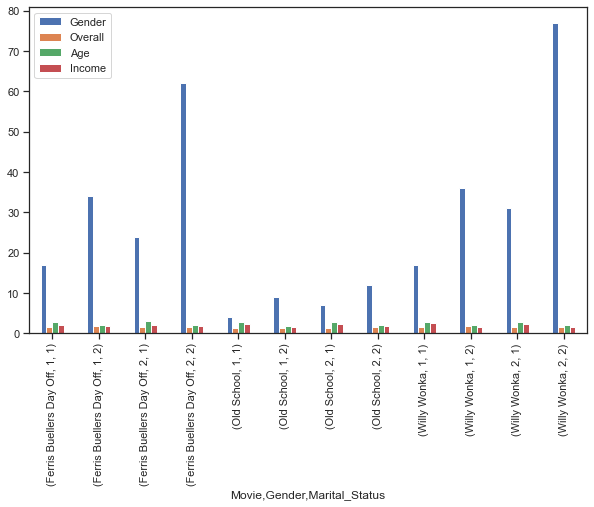

In [87]:
demographic_data.plot(kind='bar',figsize=(10,6))

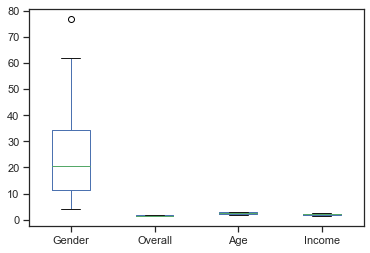

In [88]:
demographic_data.plot(kind='box')
plt.show()

([<matplotlib.axis.YTick at 0x1871d59f070>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

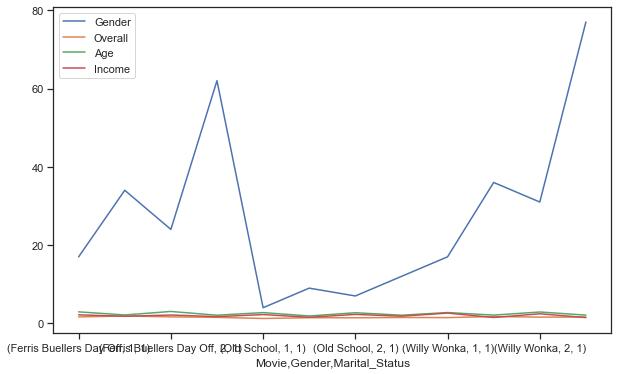

In [89]:
demographic_data.plot(figsize=(10,6))
plt.yticks(np.arange(0,81,20))

- **In what media outlet(s) should the film series be advertised?**

In [90]:
films['Media_Outlet'] = np.where(films.Hear_About==1,'television',
                                 np.where(films.Hear_About==2,'newspaper',
                                          np.where(films.Hear_About==3,'radio',
                                                   np.where(films.Hear_About==4,'website','word of mouth'))))

In [91]:
Total_Media_Outlet = films.groupby('Media_Outlet')[['Hear_About']].mean()

In [92]:
Total_Media_Outlet

,Hear_About
Media_Outlet,
newspaper,2.0
radio,3.0
television,1.0
website,4.0
word of mouth,5.0


In [93]:
Total_Media_Outlet.drop(axis=0,index='word of mouth',inplace=True)

In [94]:
Total_Media_Outlet = Total_Media_Outlet.sort_values(by='Hear_About',ascending=False)

In [95]:
Total_Media_Outlet

,Hear_About
Media_Outlet,
website,4.0
radio,3.0
newspaper,2.0
television,1.0


<BarContainer object of 4 artists>

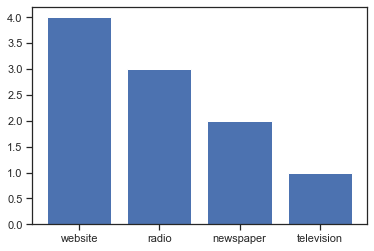

In [96]:
plt.bar(x=Total_Media_Outlet.index,height=Total_Media_Outlet.Hear_About)